## Problem Definition

#### What is Reddit?
Reddit was founded by University of Virginia roommates Steve Huffman and Alexis Ohanian in 2005. Reddit is an American website where social news is gathered, and content is criticized. Members upload contents such as links, comments, images to the site. The posts are separated by user-created topics called as subreddits. These subreddits can be news, science, movies, music, books, video games and etc.
<br>
#### Motivation
Reddit is a social networking service. Reddit provides a list of Trending Threads in real time, but it is often hard to understand what these trending topics are about. It is important and necessary to classify these topics into general categories with high accuracy for better information retrieval.
<br>
#### Statement of the Problem
The enormous popularity of Reddit makes it a fascinating website for social analysis. With such many users writing comments and these comments can be associated with related thread in their respective subreddit. The primary motivation of this project is to gain better insight on what brings people together in online communities through sentiment analysis of subreddit comments through using deep learning algorithms.

#### What we expect from you in this assignment ?
We expect you to predict correct comments metas (topic of comment) from given data by modelling deep learning and nlp methodologies. 
Below, you can find the step by step guide of project.

#### If you have any questions about the assignment, you can contact us at the following e-mail addresses:

- cgdm.akyz@gmail.com
- ozgeflzcn@gmail.com




<a name="1"></a>
## 1 - Import Libraries 
-Main Libraries for you to deploy your model (Feel free to use other libraries that you think helpful): 


<li><a href = 'https://pandas.pydata.org/'>
Pandas
</a></li> 
<li><a href = 'https://numpy.org/'>
Numpy
</a></li> 
<li><a href = 'https://scikit-learn.org/'>
Sklearn 
</a></li> 
<li><a href = 'https://www.nltk.org/'>
nltk
</a></li> 
<li><a href = 'https://keras.io/'>
keras



In [1]:
import pandas as pd 
import numpy as np
#import sklearn
import nltk
#import keras

import seaborn as sns
import matplotlib.pyplot as plt

<a name="2"></a>
## 2 - Importing the Data (65 points)


<a name="2-1"></a>
### 2.1 - Loading in the Data

Import the data set.  
- You have to import from 
<a href ='https://github.com/cigdemakyz/ITU_Odev'>
link




In [2]:
df = pd.read_csv('/Users/ozdenkose/Downloads/garanti-hw2/ITU_Odev_Data.csv')
df

,Unnamed: 0,text,subreddit,meta
0,2158334,lem me sing you the song of my people.. . w ^ ...,tf2,gaming
1,888546,my friend has been insisting on tests for year...,youshouldknow,learning
2,1072563,i thought this was a subreddit simulator post ...,circlejerk,humor
3,2506720,definitely not blitzcrank getting free samples...,leagueoflegends,gaming
4,2608104,because low prio dont punish hard enough . val...,dota2,gaming
...,...,...,...,...
231455,1134911,he saved me today,funny,humor
231456,1205868,my boss sitting next to me is confused at what...,funny,humor
231457,2252119,i think the ahri nerf is fine. i will admit he...,leagueoflegends,gaming
231458,2597565,words can not describe how much i love this,pokemon,gaming


In [3]:
df.nunique()

Unnamed: 0    231460
text           22915
subreddit         21
meta               3
dtype: int64

<a name="2-2"></a>
### 2.2 - Exploratory Data Analysis (20 points)

Please investigate your data according to 
- Their distributions 
- Check null values
- Drop unnecessary columns 


In [4]:
df.drop(columns="Unnamed: 0",inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231460 entries, 0 to 231459
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       231460 non-null  object
 1   subreddit  231460 non-null  object
 2   meta       231460 non-null  object
dtypes: object(3)
memory usage: 5.3+ MB


there is no null entry so we continue

In [6]:
meta_names = df.groupby("meta").size().reset_index(name='text_count')
meta_names

,meta,text_count
0,gaming,110214
1,humor,71585
2,learning,49661


In [7]:
subreddit_names = df.groupby("subreddit").size().reset_index(name='text_count')
subreddit_names

,subreddit,text_count
0,adviceanimals,19251
1,askhistorians,1745
2,askscience,4005
3,circlejerk,3014
4,dota2,20653
5,explainlikeimfive,4910
6,facepalm,8511
7,funny,25604
8,gaming,16773
9,imgoingtohellforthis,9206


In [8]:
grouped_df = df.groupby(['meta', 'subreddit']).size().reset_index(name='text_count')
grouped_df

,meta,subreddit,text_count
0,gaming,dota2,20653
1,gaming,gaming,16773
2,gaming,leagueoflegends,29403
3,gaming,minecraft,6060
4,gaming,pokemon,12249
5,gaming,skyrim,6471
6,gaming,starcraft,10036
7,gaming,tf2,8569
8,humor,adviceanimals,19251
9,humor,circlejerk,3014


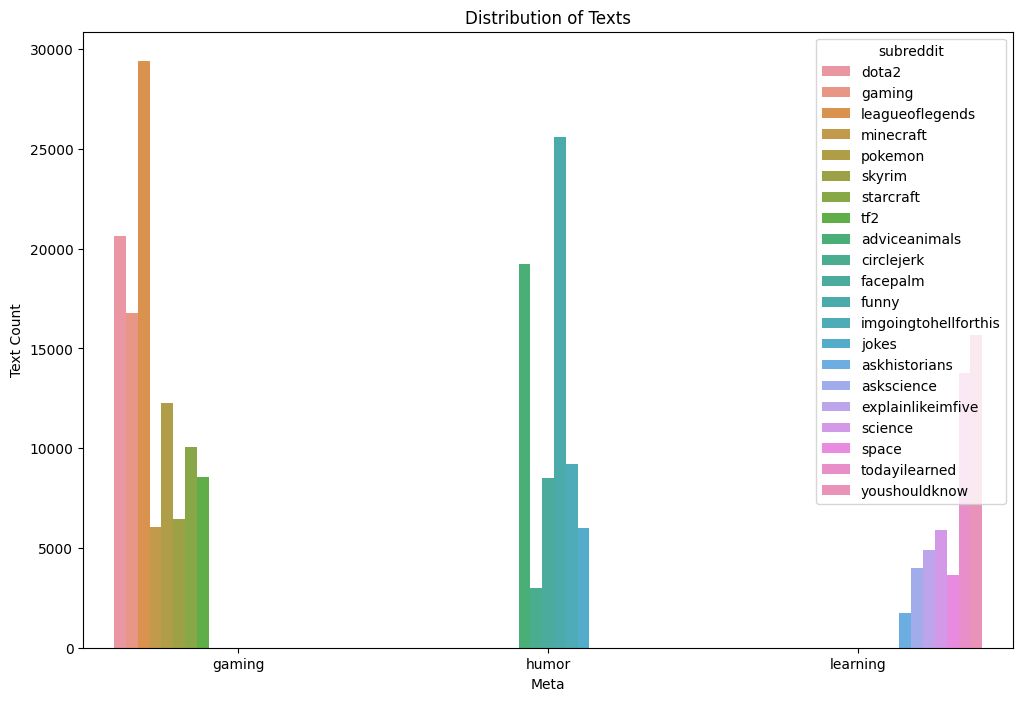

In [9]:
plt.figure(figsize=(12, 8))
sns.barplot(x='meta', y='text_count', hue='subreddit', data=grouped_df)
plt.title('Distribution of Texts')
plt.xlabel('Meta')
plt.ylabel('Text Count')
plt.show()

<Figure size 1200x800 with 0 Axes>

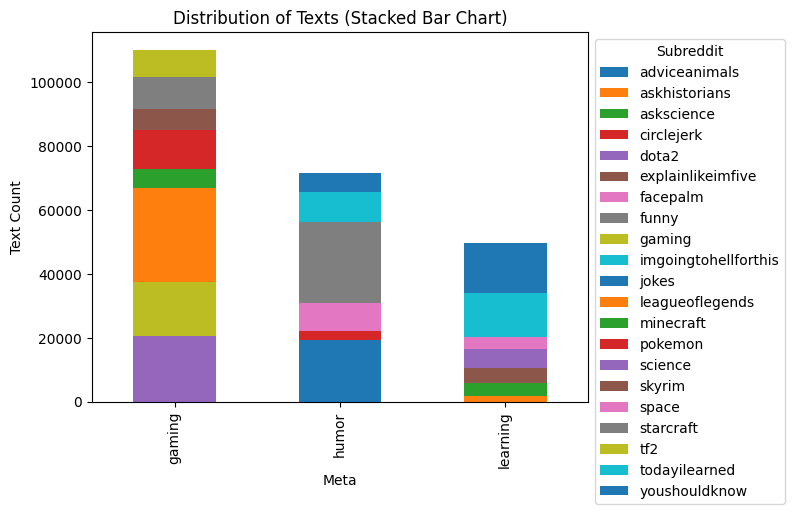

In [10]:
pivot_df = grouped_df.pivot(index='meta', columns='subreddit', values='text_count')

plt.figure(figsize=(12, 8))
pivot_df.plot(kind='bar', stacked=True)
plt.title('Distribution of Texts (Stacked Bar Chart)')
plt.xlabel('Meta')
plt.ylabel('Text Count')
plt.legend(title='Subreddit', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

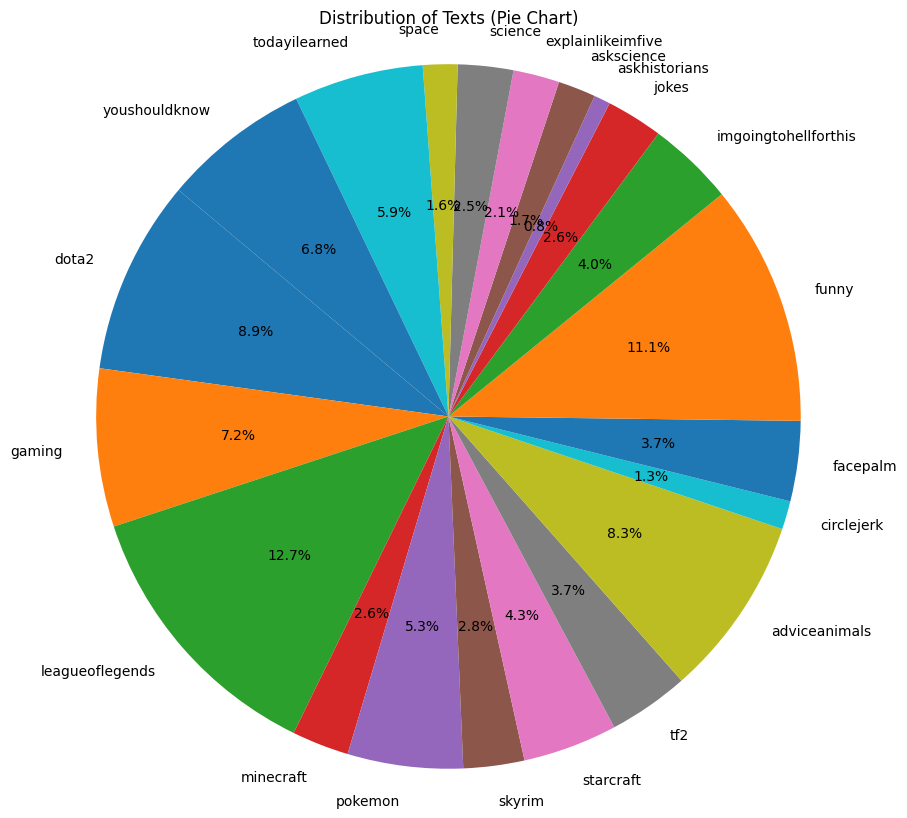

In [11]:
plt.figure(figsize=(10, 10))
plt.pie(grouped_df['text_count'], labels=grouped_df['subreddit'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Texts (Pie Chart)')
plt.axis('equal')
plt.show()

In [12]:
pd.set_option('display.max_colwidth', None)

<a name="2-3"></a>
### 2.3 - Data Preparation (25 points)

- Clean the comments
- Remove/unremove stopwords based on your assumption.
- Tokenize the comments
- Lemmatize the comments
- Vectorization
- Word count analysis and outlier detection


In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

In [13]:
df.head(3)

,text,subreddit,meta
0,lem me sing you the song of my people.. . w ^ h ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y,tf2,gaming
1,"my friend has been insisting on tests for years , she is n't any better and has been seen by many doctors. i have no idea how to help her. she 's seen 10+ doctors , they all say she either has nothing wrong or they have found tumors but they are n't harmful. she constantly vomits and has nausea , has immense stomach pain and has had to quit her job and stop going to school because this affects her so much and shes starting to get migraines . i wish speaking up for herself could help",youshouldknow,learning
2,i thought this was a subreddit simulator post at first . good meme johnny !,circlejerk,humor
3,definitely not blitzcrank getting free samples at costco : / ^ ),leagueoflegends,gaming
4,because low prio dont punish hard enough . valve should have a system that detects when a player feed in the game and if he receive x reports he get 15 low prio games ( win ) . the next time is 30 win games low prio ( the next time 60 etc ) . i doubt any1 would do this kind of shit 4k+ the same with mute system : valve should make a system that detects chat activities and if some keywords are said too much in the game the player gets muted for a week . if he does that again muted for 1 month . dota would be the most serious game out there .,dota2,gaming
5,ah yes. my favorite type of servers .,tf2,gaming
6,i got my 2gb immediately. i did n't use google apps though .,youshouldknow,learning
7,i could bet no one would like to go near to him x ),gaming,gaming
8,"boo , can not view at work because workplace firewalls suck ! any chance you could post it elsewhere ? jhin 's my current fav champ. &gt ; _&lt ;",leagueoflegends,gaming
9,"when my fists start to pop , kids start to drop .",jokes,humor


In [17]:
import re

df['cleaned_text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x).lower()))
df.head()

,text,subreddit,meta,cleaned_text
0,lem me sing you the song of my people.. . w ^ h ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y,tf2,gaming,lem me sing you the song of my people w h y y y y y y y y y y y y
1,"my friend has been insisting on tests for years , she is n't any better and has been seen by many doctors. i have no idea how to help her. she 's seen 10+ doctors , they all say she either has nothing wrong or they have found tumors but they are n't harmful. she constantly vomits and has nausea , has immense stomach pain and has had to quit her job and stop going to school because this affects her so much and shes starting to get migraines . i wish speaking up for herself could help",youshouldknow,learning,my friend has been insisting on tests for years she is nt any better and has been seen by many doctors i have no idea how to help her she s seen doctors they all say she either has nothing wrong or they have found tumors but they are nt harmful she constantly vomits and has nausea has immense stomach pain and has had to quit her job and stop going to school because this affects her so much and shes starting to get migraines i wish speaking up for herself could help
2,i thought this was a subreddit simulator post at first . good meme johnny !,circlejerk,humor,i thought this was a subreddit simulator post at first good meme johnny
3,definitely not blitzcrank getting free samples at costco : / ^ ),leagueoflegends,gaming,definitely not blitzcrank getting free samples at costco
4,because low prio dont punish hard enough . valve should have a system that detects when a player feed in the game and if he receive x reports he get 15 low prio games ( win ) . the next time is 30 win games low prio ( the next time 60 etc ) . i doubt any1 would do this kind of shit 4k+ the same with mute system : valve should make a system that detects chat activities and if some keywords are said too much in the game the player gets muted for a week . if he does that again muted for 1 month . dota would be the most serious game out there .,dota2,gaming,because low prio dont punish hard enough valve should have a system that detects when a player feed in the game and if he receive x reports he get low prio games win the next time is win games low prio the next time etc i doubt any would do this kind of shit k the same with mute system valve should make a system that detects chat activities and if some keywords are said too much in the game the player gets muted for a week if he does that again muted for month dota would be the most serious game out there


In [22]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ozdenkose/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
from nltk.tokenize import word_tokenize

df['tokenized_text'] = df['cleaned_text'].apply(word_tokenize)



,text,subreddit,meta,cleaned_text,tokenized_text
0,lem me sing you the song of my people.. . w ^ h ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y,tf2,gaming,lem sing song people w h,"[lem, sing, song, people, w, h]"
1,"my friend has been insisting on tests for years , she is n't any better and has been seen by many doctors. i have no idea how to help her. she 's seen 10+ doctors , they all say she either has nothing wrong or they have found tumors but they are n't harmful. she constantly vomits and has nausea , has immense stomach pain and has had to quit her job and stop going to school because this affects her so much and shes starting to get migraines . i wish speaking up for herself could help",youshouldknow,learning,friend insisting tests years nt better seen many doctors idea help seen doctors say either nothing wrong found tumors nt harmful constantly vomits nausea immense stomach pain quit job stop going school affects much shes starting get migraines wish speaking could help,"[friend, insisting, tests, years, nt, better, seen, many, doctors, idea, help, seen, doctors, say, either, nothing, wrong, found, tumors, nt, harmful, constantly, vomits, nausea, immense, stomach, pain, quit, job, stop, going, school, affects, much, shes, starting, get, migraines, wish, speaking, could, help]"
2,i thought this was a subreddit simulator post at first . good meme johnny !,circlejerk,humor,thought subreddit simulator post first good meme johnny,"[thought, subreddit, simulator, post, first, good, meme, johnny]"
3,definitely not blitzcrank getting free samples at costco : / ^ ),leagueoflegends,gaming,definitely blitzcrank getting free samples costco,"[definitely, blitzcrank, getting, free, samples, costco]"
4,because low prio dont punish hard enough . valve should have a system that detects when a player feed in the game and if he receive x reports he get 15 low prio games ( win ) . the next time is 30 win games low prio ( the next time 60 etc ) . i doubt any1 would do this kind of shit 4k+ the same with mute system : valve should make a system that detects chat activities and if some keywords are said too much in the game the player gets muted for a week . if he does that again muted for 1 month . dota would be the most serious game out there .,dota2,gaming,low prio dont punish hard enough valve system detects player feed game receive x reports get low prio games win next time win games low prio next time etc doubt would kind shit k mute system valve make system detects chat activities keywords said much game player gets muted week muted month dota would serious game,"[low, prio, dont, punish, hard, enough, valve, system, detects, player, feed, game, receive, x, reports, get, low, prio, games, win, next, time, win, games, low, prio, next, time, etc, doubt, would, kind, shit, k, mute, system, valve, make, system, detects, chat, activities, keywords, said, much, game, player, gets, muted, week, muted, month, dota, would, serious, game]"


In [42]:
from nltk.stem import WordNetLemmatizer
## lemmatizer sıkıntılı
lemmatizer = WordNetLemmatizer()
df['lemmatized_text'] = df['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

df.head()

,text,subreddit,meta,cleaned_text,tokenized_text,lemmatized_text
0,lem me sing you the song of my people.. . w ^ h ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y ^ y,tf2,gaming,lem sing song people w h,"[lem, sing, song, people, w, h]","[lem, sing, song, people, w, h]"
1,"my friend has been insisting on tests for years , she is n't any better and has been seen by many doctors. i have no idea how to help her. she 's seen 10+ doctors , they all say she either has nothing wrong or they have found tumors but they are n't harmful. she constantly vomits and has nausea , has immense stomach pain and has had to quit her job and stop going to school because this affects her so much and shes starting to get migraines . i wish speaking up for herself could help",youshouldknow,learning,friend insisting tests years nt better seen many doctors idea help seen doctors say either nothing wrong found tumors nt harmful constantly vomits nausea immense stomach pain quit job stop going school affects much shes starting get migraines wish speaking could help,"[friend, insisting, tests, years, nt, better, seen, many, doctors, idea, help, seen, doctors, say, either, nothing, wrong, found, tumors, nt, harmful, constantly, vomits, nausea, immense, stomach, pain, quit, job, stop, going, school, affects, much, shes, starting, get, migraines, wish, speaking, could, help]","[friend, insisting, test, year, nt, better, seen, many, doctor, idea, help, seen, doctor, say, either, nothing, wrong, found, tumor, nt, harmful, constantly, vomit, nausea, immense, stomach, pain, quit, job, stop, going, school, affect, much, shes, starting, get, migraine, wish, speaking, could, help]"
2,i thought this was a subreddit simulator post at first . good meme johnny !,circlejerk,humor,thought subreddit simulator post first good meme johnny,"[thought, subreddit, simulator, post, first, good, meme, johnny]","[thought, subreddit, simulator, post, first, good, meme, johnny]"
3,definitely not blitzcrank getting free samples at costco : / ^ ),leagueoflegends,gaming,definitely blitzcrank getting free samples costco,"[definitely, blitzcrank, getting, free, samples, costco]","[definitely, blitzcrank, getting, free, sample, costco]"
4,because low prio dont punish hard enough . valve should have a system that detects when a player feed in the game and if he receive x reports he get 15 low prio games ( win ) . the next time is 30 win games low prio ( the next time 60 etc ) . i doubt any1 would do this kind of shit 4k+ the same with mute system : valve should make a system that detects chat activities and if some keywords are said too much in the game the player gets muted for a week . if he does that again muted for 1 month . dota would be the most serious game out there .,dota2,gaming,low prio dont punish hard enough valve system detects player feed game receive x reports get low prio games win next time win games low prio next time etc doubt would kind shit k mute system valve make system detects chat activities keywords said much game player gets muted week muted month dota would serious game,"[low, prio, dont, punish, hard, enough, valve, system, detects, player, feed, game, receive, x, reports, get, low, prio, games, win, next, time, win, games, low, prio, next, time, etc, doubt, would, kind, shit, k, mute, system, valve, make, system, detects, chat, activities, keywords, said, much, game, player, gets, muted, week, muted, month, dota, would, serious, game]","[low, prio, dont, punish, hard, enough, valve, system, detects, player, feed, game, receive, x, report, get, low, prio, game, win, next, time, win, game, low, prio, next, time, etc, doubt, would, kind, shit, k, mute, system, valve, make, system, detects, chat, activity, keywords, said, much, game, player, get, muted, week, muted, month, dota, would, serious, game]"
5,ah yes. my favorite type of servers .,tf2,gaming,ah yes favorite type servers,"[ah, yes, favorite, type, servers]","[ah, yes, favorite, type, server]"
6,i got my 2gb 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Display the TF-IDF matrix
print(tfidf_matrix)

<a name="2-4"></a>
### 2.4 - TF(Term Frequency) - IDF(Inverse Document Frequency) (15 points)

- Explain TF & IDF 
- Apply TF & IDF methods


<a name="2-5"></a>
### 2.5 - Train/Test Split (5)

- Target preparation
- Split the data


<a name="3"></a>
## 3 - Training Deep Learning Models (30 points)


- Import relevant libraries
- Please explain difference between NN and CNN.

In [15]:
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D, Flatten
from keras.layers import Dense, Input, Embedding, Dropout, Activation

ModuleNotFoundError: No module named 'keras'

<a name="3.1"></a>
## 3.1 - Training NN models


- Construct NN models from basic one (exp. with one layer) to complex (more layer included).
- Use different optimizers, regularization methods, drop-out, normalization etc.
- Evaluate in test data for different trials

<a name="4"></a>
## 4 - Testing with your Own Input (5 points)


- Finally you will test with your own input.

In [ ]:
# try a positive sentence
sentence = "" # write a sentence for each class
tmp_pred, tmp_sentiment = predict(sentence)
print(f"The sentiment of the sentence \n***\n\"{sentence}\"\n***\nis {tmp_sentiment}.")

<a name="5"></a>
## 5 - BONUS - Training CNN Models (20 points)

- Construct CNN models from basic one (exp. with one layer) to complex (more layer included).
- Use different optimizers, regularization methods, drop-out, normalization etc.
- Evaluate in test data for different trials